<a href="https://colab.research.google.com/github/AlineEmmer/Machine-Learning/blob/main/Machine_learning_Diabetes_Dislipidemia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##In this project, a database containing infrared spectra of patients was analyzed: group 0 = patients with mixed dyslipidemia (n=100), group 1 = patients with diabetes (n=100), group 2 = patients with hypercholesterolemia (n=100 ), group 3 = patients with hypertriglyceridemia (n=100), group 4-healthy volunteers (n=100), group 5= patients with pre-diabetes (n=100). The goal is to develop a machine learning model to predict diabetes and dyslipidemia and to identify biomarkers associated with these diseases, with a view to optimizing the diagnosis

In [ ]:
# Task to be performed
# Step 1: Import the database
# Step 2: Import the Pandas library to help manipulate the database
# Step 3: Remove unnecessary columns
# Step 4: Installing the Pycaret library (helps to perform Auto-Machine Learn)
# Step 5: Importing the Pycaret library
# Step 6: Pre-processing the data
# Step 7: Building and comparing different models
# Step 8: Training the best model based on predictive performance metrics
# Step 9: Extracting the metrics results from the model
# Step 10: Conclusions about the model
# Step 11: Saving the model to make predictions in real life (Deploy)

In [37]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [38]:
# Step 2: Import the Pandas library to help manipulate the database
import pandas as pd
df1 = pd.read_excel("Dataset.xlsx")
display (df1)

,Classes,3998.4,3997,3995.6,3994.2,3992.8,3991.3,3989.9,3988.5,3987.1,...,412.3,410.9,409.5,408.1,406.6,405.2,403.8,402.4,401,399.6
0,PREDM,0.9979,0.9973,0.9970,0.9970,0.9972,0.9972,0.9971,0.9970,0.9970,...,0.2580,0.2571,0.2563,0.2561,0.2565,0.2568,0.2565,0.2554,0.2541,0.2538
1,PREDM,0.9976,0.9973,0.9971,0.9971,0.9969,0.9965,0.9961,0.9963,0.9968,...,0.2561,0.2537,0.2523,0.2527,0.2539,0.2548,0.2545,0.2532,0.2515,0.2503
2,PREDM,0.9973,0.9968,0.9966,0.9966,0.9969,0.9970,0.9970,0.9970,0.9970,...,0.2556,0.2558,0.2565,0.2579,0.2595,0.2607,0.2609,0.2594,0.2558,0.2508
3,PREDM,0.9969,0.9964,0.9962,0.9964,0.9967,0.9968,0.9966,0.9966,0.9968,...,0.2558,0.2554,0.2550,0.2551,0.2558,0.2567,0.2567,0.2550,0.2517,0.2478
4,PREDM,0.9979,0.9974,0.9969,0.9966,0.9966,0.9966,0.9966,0.9967,0.9969,...,0.2559,0.2545,0.2534,0.2532,0.2541,0.2550,0.2552,0.2548,0.2545,0.2551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,DYS,0.9959,0.9956,0.9953,0.9951,0.9953,0.9956,0.9958,0.9957,0.9954,...,0.2691,0.2686,0.2678,0.2674,0.2675,0.2671,0.2657,0.2639,0.2630,0.2630
596,DYS,0.9964,0.9964,0.9960,0.9955,0.9952,0.9950,0.9950,0.9948,0.9945,...,0.2653,0.2648,0.2659,0.2674,0.2684,0.2680,0.2664,0.2651,0.2651,0.2664
597,DYS,0.9958,0.9958,0.9957,0.9957,0.9959,0.9961,0.9961,0.9959,0.9954,...,0.2715,0.2713,0.2708,0.2700,0.2684,0.2662,0.2641,0.2626,0.2620,0.2627
598,DYS,0.9964,0.9960,0.9955,0.9953,0.9954,0.9958,0.9961,0.9962,0.9959,...,0.2687,0.2672,0.2671,0.2681,0.2692,0.2695,0.2689,0.2675,0.2656,0.2641


In [ ]:
# Step 4: Installing the Pycaret library (helps to perform Auto-Machine Learn)
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Step 5: Importing the classification library from PyCaret
from pycaret import classification


In [39]:
# Step 6: Pre-processing the data
classification_setup = classification.setup(data = df1, target = "Classes")

,Description,Value
0,Session id,7554
1,Target,Classes
2,Target type,Multiclass
3,Target mapping,"DM2: 0, DYS: 1, HC: 2, HT: 3, Healthy: 4, PREDM: 5"
4,Original data shape,"(600, 2542)"
5,Transformed data shape,"(600, 2542)"
6,Transformed train set shape,"(420, 2542)"
7,Transformed test set shape,"(180, 2542)"
8,Numeric features,2541
9,Preprocess,True


In [ ]:
# Step 7: Building and comparing different models
best = classification.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:59:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9833,0.9982,0.9833,0.9848,0.9833,0.9800,0.9803,1.8220
dt,Decision Tree Classifier,0.9810,0.9900,0.9810,0.9827,0.9809,0.9771,0.9775,1.6280
knn,K Neighbors Classifier,0.9714,0.9938,0.9714,0.9744,0.9713,0.9657,0.9664,1.1760
nb,Naive Bayes,0.9524,0.9810,0.9524,0.9601,0.9515,0.9429,0.9447,0.8060
ridge,Ridge Classifier,0.9429,0.0000,0.9429,0.9522,0.9415,0.9314,0.9337,1.0470
lr,Logistic Regression,0.9048,0.9934,0.9048,0.9176,0.9030,0.8857,0.8887,8.3560
qda,Quadratic Discriminant Analysis,0.5762,0.7640,0.5762,0.5309,0.5156,0.4914,0.5129,1.2520
ada,Ada Boost Classifier,0.5071,0.8656,0.5071,0.3282,0.3779,0.4086,0.4770,4.7490
svm,SVM - Linear Kernel,0.2167,0.0000,0.2167,0.0560,0.0859,0.0600,0.0811,1.3900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [14]:
# Step 8: Training the best model based on predictive performance metrics
# Note: The PLS-DA model was one of the top three. Now, we will create and validate the Linear Discriminant Analysis model
best_model = classification.create_model("lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9946,0.9524,0.9583,0.9521,0.9429,0.9441
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9762,0.9986,0.9762,0.9792,0.9761,0.9714,0.9721
4,0.9524,1.0000,0.9524,0.9630,0.9514,0.9429,0.9454
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8810,0.9905,0.8810,0.8760,0.8772,0.8571,0.8577
7,0.9524,0.9993,0.9524,0.9583,0.9521,0.9429,0.9441
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
# Step 9: Extracting the metrics results from the model
classification.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

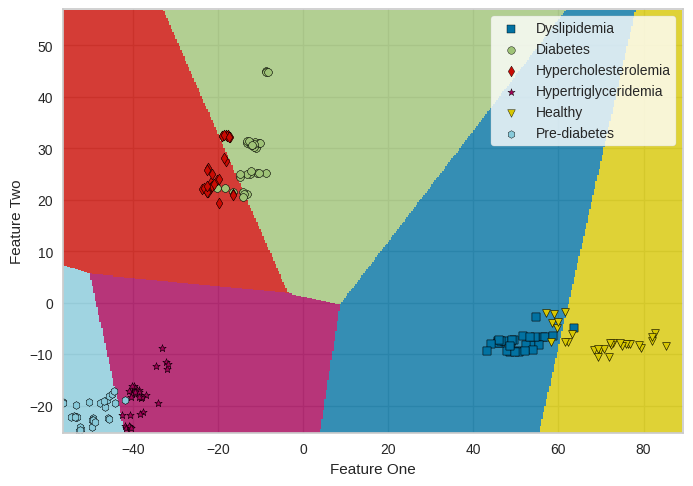

In [ ]:
#Step 10: Plotting the decision boundary plot
classification.plot_model(lda_model, plot ="boundary", plot_kwargs ={'classes': ["Dyslipidemia", "Diabetes", "Hypercholesterolemia", "Hypertriglyceridemia", "Healthy", "Pre-diabetes"]})

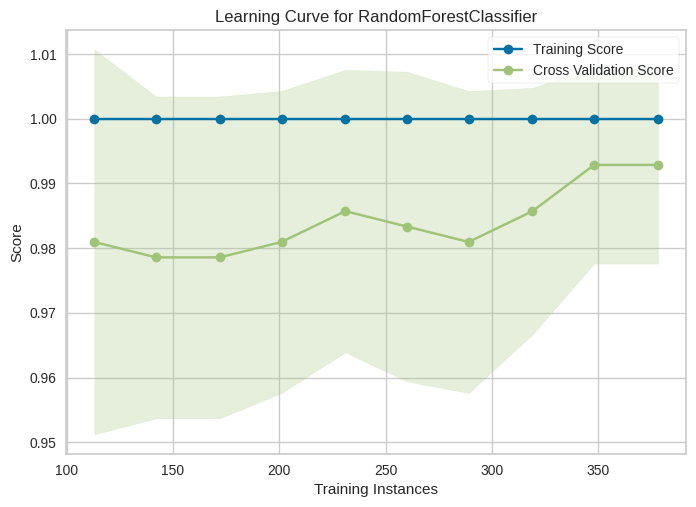

In [ ]:
# Step 11: Plotting the learning curve
classification.plot_model(rf_model, plot ="learning")


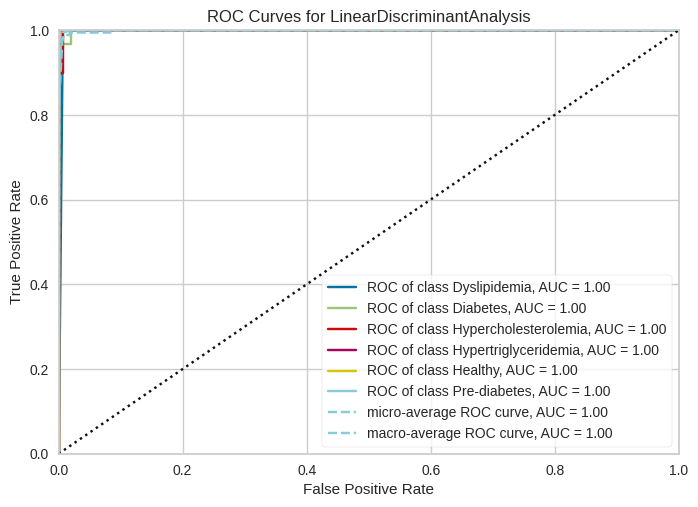

In [ ]:
# Step 12: Plotting the ROC curves
classification.plot_model(rf_model, plot ="auc", plot_kwargs ={'classes': ["Dyslipidemia", "Diabetes", "Hypercholesterolemia", "Hypertriglyceridemia", "Healthy", "Pre-diabetes"]})

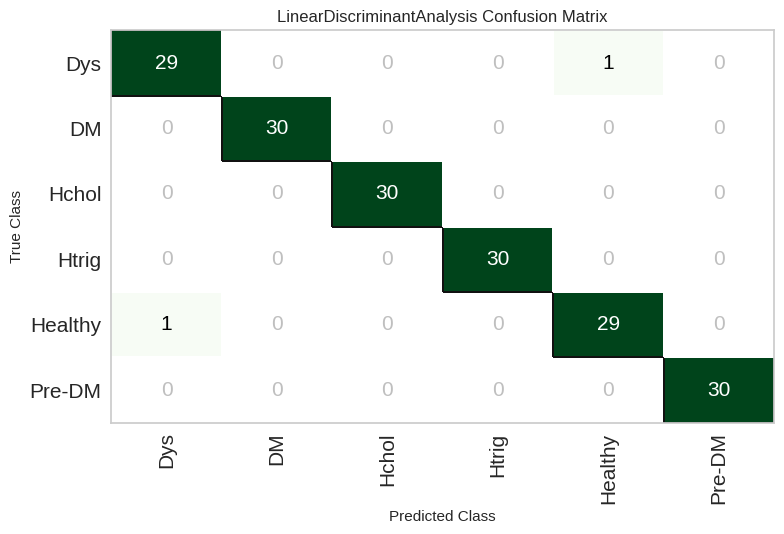

In [ ]:
# Step 13: Plotting de confusion matrix graph
classification.plot_model(lda_model, plot ="confusion_matrix", plot_kwargs ={'classes': ["Dys", "DM", "Hchol", "Htrig", "Healthy", "Pre-DM"]})
classification.plot_model(lda_model, plot ="confusion_matrix", plot_kwargs ={'classes': ["Dys", "DM", "Hchol", "Htrig", "Healthy", "Pre-DM"]}, 
                          scale = 3, save = True)

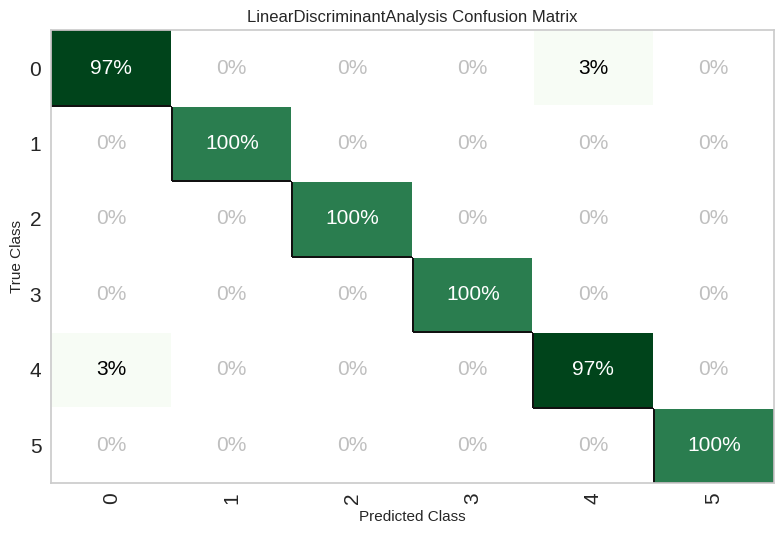

In [ ]:
# Step 14: Plotting de percent confusion matrix graph
classification.plot_model(lda_model, plot ="confusion_matrix", plot_kwargs = {'percent' : True})
classification.plot_model(lda_model, plot ="confusion_matrix", plot_kwargs = {'percent' : True},scale = 3, save = True)

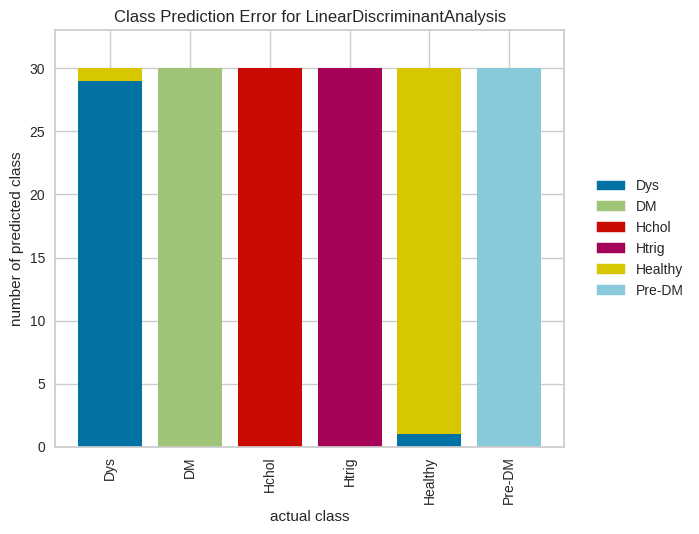

In [ ]:
# Step 15: Compare predictions and results of the model
classification.plot_model(lda_model, plot ="error", plot_kwargs ={'classes': ["Dys", "DM", "Hchol", "Htrig", "Healthy", "Pre-DM"]})
classification.plot_model(lda_model, plot ="error", plot_kwargs ={'classes': ["Dys", "DM", "Hchol", "Htrig", "Healthy", "Pre-DM"]}, 
                          scale = 3, save = True)

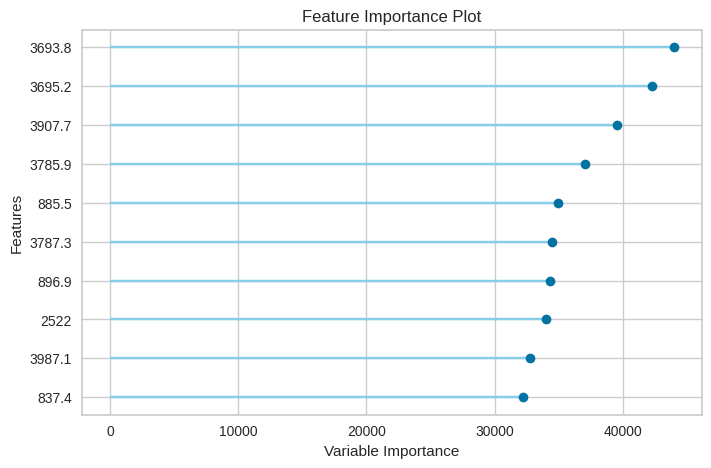

In [ ]:
# Step 16: Plotting only the TOP 10 most important wavenumber
classification.plot_model(lda_model, plot ="feature")
classification.plot_model(lda_model, plot ="feature", scale = 3, save = True)

In [ ]:
from pycaret.datasets import get_data
diabetes = get_data('df1')
interpret_model(lda_model)

NameError: ignored

In [ ]:
#List of available plots (ID - Name): https://pycaret.readthedocs.io/en/stable/api/classification.html
#‘pipeline’ - Schematic drawing of the preprocessing pipeline
#‘auc’ - Area Under the Curve
#‘threshold’ - Discrimination Threshold
#‘pr’ - Precision Recall Curve
#‘confusion_matrix’ - Confusion Matrix
#‘error’ - Class Prediction Error
#‘class_report’ - Classification Report
#‘boundary’ - Decision Boundary
#‘rfe’ - Recursive Feature Selection
#‘learning’ - Learning Curve
#‘manifold’ - Manifold Learning
#‘calibration’ - Calibration Curve
#‘vc’ - Validation Curve
#‘dimension’ - Dimension Learning
#‘feature’ - Feature Importance
#‘feature_all’ - Feature Importance (All)
#‘parameter’ - Model Hyperparameter
#‘lift’ - Lift Curve
#‘gain’ - Gain Chart
#‘tree’ - Decision Tree
#‘ks’ - KS Statistic Plot

#save: bool, default = False
#scale: float, default = 1
# Plotando apenas os TOP 10 biomarcadoers mais importantes
classification.plot_model(lda_model, plot ="boundary", plot_kwargs ={'classes': ["Dyslipidemia", "Diabetes", "Hypercholesterolemia", "Hypertriglyceridemia", "Healthy", "Pre-diabetes"]}, 
                          scale = 3, save = True)

'Decision Boundary.png'

In [ ]:
classification.plot_model(rf_model, plot ="learning", scale = 3, save = True)

'Learning Curve.png'

In [ ]:
classification.plot_model(rf_model, plot ="auc", plot_kwargs ={'classes': ["Dyslipidemia", "Diabetes", "Hypercholesterolemia", "Hypertriglyceridemia", "Healthy", "Pre-diabetes"]}, scale = 3, save = True)

'AUC.png'

In [ ]:
# Passo 10: Conclusoes sobre o modelo
# Diversos Modelos de machine learning foram construidos para a predição do diagnóstico de diabetes e dislipidemia usando dados do espectro de infravermelho de amostras de soro de indivíduos
# O modelo de PLS-DA foi um dos que apresentaram melhor desempenho preditivo
#  Os top 5 comprimentos de onda mais importantes para o diagnóstico de diabetes foram: 828, 850/851, 2618/2619, 3825, 3857, 3951/3953/3955  
# O próximo passo é desenvoler o App para que o modelo seja utilizado nas Unidados de saúde com vista a otimizar o início do tratamento farmacológico em pacientes que apresentarem pré-diabetes ou DM2

In [ ]:
# Passo 11: Salvando o modelo para realizar predições na vida real (Deploy)
classification.save_model(modelo_lda, "melhor_modelo_lda")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5365, verbose=0,
                       warm_start=False), model_name=melhor_modelo_LR, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      num

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l